## Exploratory Data Analysis and Preparation
This notebook showcases the pipeline for the preparation of our datasets from the different modalities used for our research problem.


Import necessary libraries

# Ethics Section

As part of our commitment to ethical research and development, we provide the below three documents:

- [Data_Card_Target_HWM.docx](./notebooks/Data_Card_Target_HWM.docx) - Data Card
- [RF_Model_Card.docx](./notebooks/RF_Model_Card.docx) - RF model Card
- [Feature_Routing_Model_Card.docx](./notebooks/Feature_Routing_Model_Card.docx) - Feature Routing Model Card
These documents describe the datasets and models used in this project, ensuring transparency and compliance with the I-GUIDE ethics toolkit.
---


In [1]:
import os, warnings
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

import umap

from utils import (merge_features,
                    datetime_cyclical_transform,
                    input_missing_values,
                    find_id_like_columns
                    )

/anvil/projects/x-cis250634/team5/envs/flood_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Merge datasets from all modalities and transform them

In [2]:
# base_dir = os.path.dirname(os.getcwd())
data_dir = os.path.join(".", 'data')

file_names = [
    'dem_features.csv',
    'combined_nlcd_features.csv',
    'precipitation.csv',
    'sentinel1_combined_features.csv',
    'USGS_HWM_Height.csv',
    'soil_moisture.csv',
    'Weather_Data.csv'
]

combined_features = merge_features(data_dir, file_names)

Date Time Cyclical Transformation

In [3]:
combined_features = datetime_cyclical_transform(combined_features)

Handling Missing Data with KNN Imputation

In [4]:
df_imputed = input_missing_values(combined_features)

Export the combined features to a file

In [5]:
# df_imputed.to_csv(os.path.join('../data/combined_features.csv'))
df_imputed.to_csv(os.path.join(data_dir, 'combined_features.csv'))
print("Combined features saved successfully")


Combined features saved successfully


Show 15 random samples of the datasets

In [6]:
df_imputed.sample(10)

dem_min     dem_max   dem_mean    dem_iqr  total_area_km2  \
ID                                                                   
3324    4.642394   10.790681   8.492591   0.482756          9.1809   
7692   -0.867160    4.640627   0.274878   1.192841          9.1809   
7545   -0.867160    5.952794   0.146276   0.300000          9.1809   
7313   -1.020460    4.546253   0.963976   2.307177          9.1809   
7277   -0.867160    9.535200   3.148914   6.148631          9.1809   
14687  70.070000   79.786730  75.066635   2.441139          9.1809   
6546    4.041745   25.775705  12.582239   5.377687          9.1809   
3494   11.043000   24.978777  21.355950   0.832311          9.1809   
7610   -1.020460    6.290404   2.252590   3.049318          9.1809   
6303   35.535717  102.080460  73.849700  32.084479          9.1809   

       pct_area_1  pct_area_2  area_km_1  area_km_2      cai_1  ...  \
ID                                                              ...   
3324     2.587982    4.646603     0.2376     0.4266   6.504065  ...   
7692     1.274385    0.000000     0.1170     0.0000   0.000000  ...   
7545     1.725321    1.656700     0.1584     0.1521   0.000000  ...   
7313     5.234781    0.862661     0.4806     0.0792   6.079665  ...   
7277     9.861778    3.401627     0.9054     0.3123   0.000000  ...   
14687   23.076169   32.124302     2.1186     2.9493  21.735320  ...   
6546    37.349279   29.663758     3.4290     2.7234  31.873999  ...   
3494     1.901774    0.049015     0.1746     0.0045   0.000000  ...   
7610     7.381629    0.431330     0.6777     0.0396   7.837446  ...   
6303     3.627095    0.470542     0.3330     0.0432  11.162791  ...   

       feelslike_c  windchill_c  heatindex_c  chance_of_rain  chance_of_snow  \
ID                                                                             
3324          24.9         22.7         24.9             0.0             0.0   
7692          31.7         27.7         31.7           100.0             0.0   
7545          30.0         26.5         30.0           100.0             0.0   
7313          31.7         27.7         31.7           100.0             0.0   
7277          30.0         26.5         30.0           100.0             0.0   
14687         25.6         23.3         25.6             0.0             0.0   
6546          27.4         24.9         27.4           100.0             0.0   
3494          24.7         22.3         24.7           100.0             0.0   
7610          28.3         25.3         28.3           100.0             0.0   
6303          13.9         13.9         14.8             0.0             0.0   

       vis_km  year     month_sin   day_sin  hour_sin  
ID                                                     
3324     10.0  2017 -8.660254e-01 -0.201299 -0.965926  
7692      3.0  2018 -8.660254e-01  0.897805 -0.965926  
7545     10.0  2018 -8.660254e-01  0.897805 -0.965926  
7313      3.0  2018 -8.660254e-01  0.897805 -0.965926  
7277     10.0  2018 -8.660254e-01  0.897805 -0.965926  
14687    10.0  2019  1.224647e-16  0.848644  0.965926  
6546      7.0  2018 -1.000000e+00  0.299363  0.866025  
3494      5.0  2017 -8.660254e-01 -0.394356 -0.965926  
7610      7.0  2018 -8.660254e-01  0.897805 -0.965926  
6303     10.0  2018 -8.660254e-01 -0.485302 -0.866025  

[10 rows x 61 columns]

#### UMAP Clustering of the Embeddings

Not wanted columns dropped: ['ID', 'height_above']
Final feature matrix shape: (1147, 60)


/anvil/projects/x-cis250634/team5/envs/flood_env/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


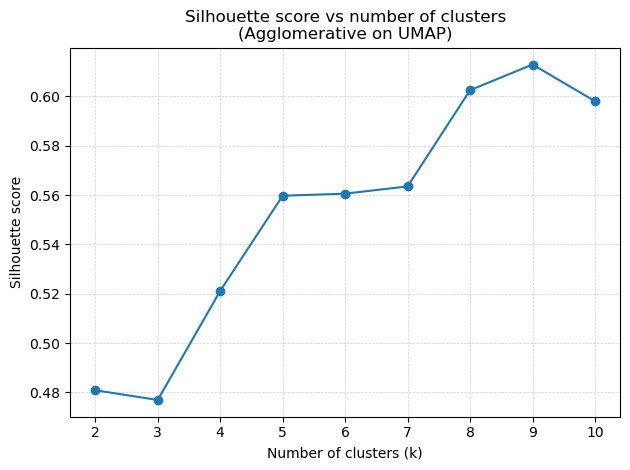

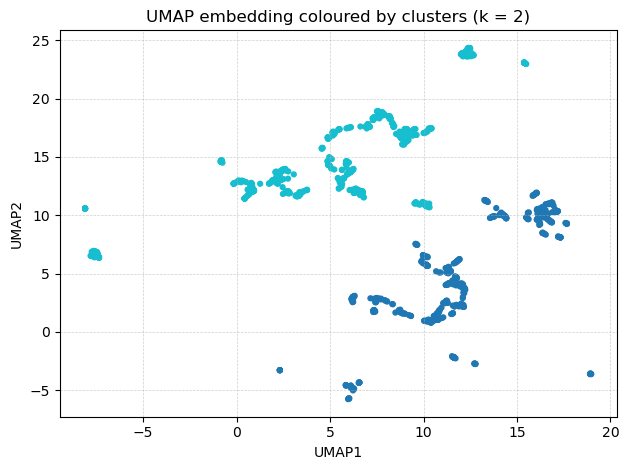

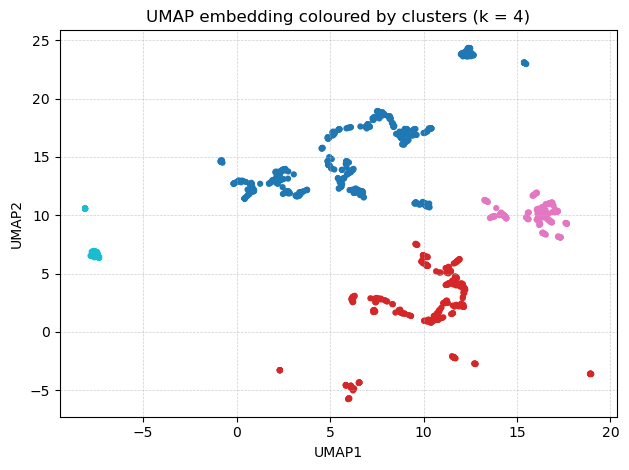

All done! Files saved in → /anvil/projects/x-cis250634/team5/Rufai/Flood-height-prediction/figures/Input_Clustering_Results


In [7]:
# TODO: turn to a function:: 

INPUT_CSV    = "data/combined_features.csv"
OUTPUT_DIR   = "figures/Input_Clustering_Results"
SEED         = 42                        # random state for reproducibility
K_MIN, K_MAX = 2, 10                     # range of cluster counts
N_NEIGHBORS  = 15                        # UMAP n_neighbors
MIN_DIST     = 0.1                       # UMAP min_dist

# ##  Load data & preprocess
os.makedirs(OUTPUT_DIR, exist_ok=True)

df_raw = pd.read_csv(INPUT_CSV)
id_cols = find_id_like_columns(df_raw)

print("Not wanted columns dropped:", id_cols or "None")

# Drop IDs, coerce non-numeric to numeric, drop all-NaN cols
X_df = df_raw.drop(columns=id_cols, errors="ignore").copy()
for col in X_df.columns:
    if not np.issubdtype(X_df[col].dtype, np.number):
        X_df[col] = pd.to_numeric(X_df[col], errors="coerce")

nan_cols = [c for c in X_df.columns if X_df[c].isna().all()]
if nan_cols:
    X_df.drop(columns=nan_cols, inplace=True)
    print("All-NaN columns dropped:", nan_cols)

# scale
X = SimpleImputer(strategy="median").fit_transform(X_df.values)
X = StandardScaler().fit_transform(X)

print(f"Final feature matrix shape: {X.shape}")

# ## UMAP embedding (2-D)

# %%
reducer = umap.UMAP(
    n_components=2,
    n_neighbors=N_NEIGHBORS,
    min_dist=MIN_DIST,
    metric="euclidean",
    random_state=SEED,
)
embedding = reducer.fit_transform(X)          # (n_samples, 2)

# DataFrame for easy plotting / saving
emb_df = pd.DataFrame(embedding, columns=["UMAP1", "UMAP2"])

# Clustering + silhouette

# %%
k_range = range(K_MIN, K_MAX + 1)
labels_by_k = {}
silhouette_rows = []

for k in k_range:
    model = AgglomerativeClustering(n_clusters=k, linkage="ward")
    labels = model.fit_predict(embedding)
    labels_by_k[k] = labels
    sil = silhouette_score(embedding, labels, metric="euclidean")
    silhouette_rows.append({"k": k, "silhouette": sil})

sil_df = pd.DataFrame(silhouette_rows)
sil_df.to_csv(f"{OUTPUT_DIR}/silhouette_scores.csv", index=False)

# %% [markdown]
# ##  Plot silhouette curve

# %%
plt.figure()
plt.plot(sil_df["k"], sil_df["silhouette"], marker="o")
plt.title("Silhouette score vs number of clusters\n(Agglomerative on UMAP)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.grid(True, ls="--", lw=0.5, alpha=0.6)
plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/silhouette_scores.png", dpi=150)
plt.show()

# ## UMAP scatter for each *k*

# %%
for k in k_range:
    plt.figure()
    plt.scatter(
        emb_df["UMAP1"], emb_df["UMAP2"],
        c=labels_by_k[k], s=12, cmap="tab10"
    )
    plt.title(f"UMAP embedding coloured by clusters (k = {k})")
    plt.xlabel("UMAP1"); plt.ylabel("UMAP2")
    plt.grid(True, ls="--", lw=0.5, alpha=0.6)
    plt.tight_layout()
    plt.savefig(f"{OUTPUT_DIR}/umap_k{k}.png", dpi=150)
    plt.show()

# ##  Save embedding + all labels (optional)

# %%
out_df = emb_df.copy()
# keep original IDs only for reference
for c in id_cols:
    out_df[c] = df_raw[c].values
# attach label columns
for k in k_range:
    out_df[f"labels_k{k}"] = labels_by_k[k]

out_df.to_csv(f"{OUTPUT_DIR}/umap_embedding_and_labels.csv", index=False)
print("All done! Files saved in →", os.path.abspath(OUTPUT_DIR))
